In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
data = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
col_l = []
for col in data.columns:
    col = col.replace(" ","_")
    col_l.append(col.lower())
data.columns = col_l
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [4]:
numeric = data.select_dtypes(np.number)
numeric.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [5]:
numeric.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

customer_lifetime_value


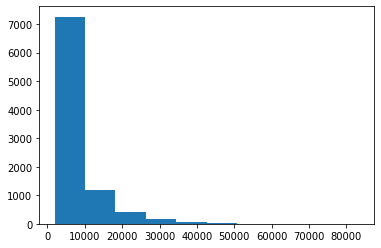

income


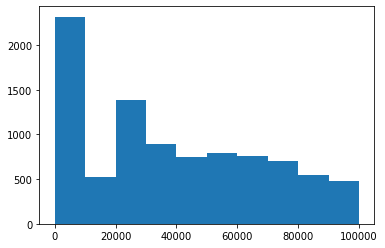

monthly_premium_auto


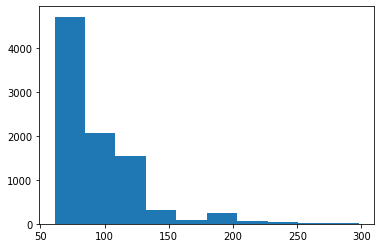

months_since_last_claim


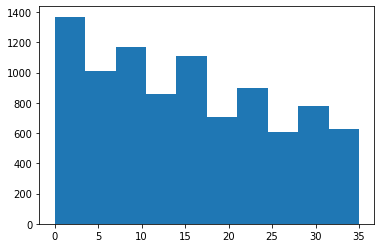

months_since_policy_inception


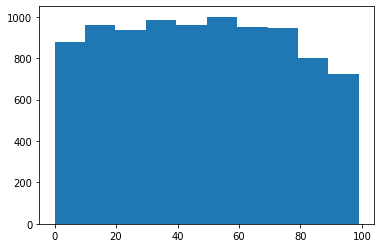

number_of_open_complaints


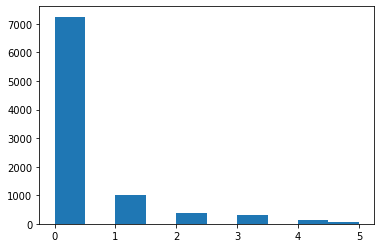

number_of_policies


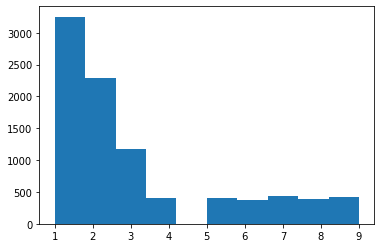

total_claim_amount


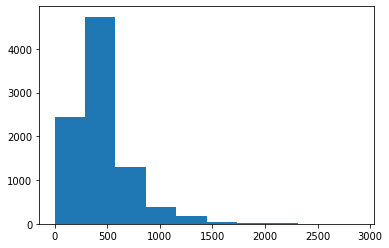

In [6]:
for col in numeric.columns:
    print(col)
    #col_plot = numeric[col].hist()
    plt.hist(numeric[col])
    plt.show()
    #col_plot
    


In [7]:
data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [8]:
# From the above plots, columns 'customer_lifetime_value','income','monthly_premium_auto','total_claim_amount' have
# outliers on the lower side
outlier = ['customer_lifetime_value','monthly_premium_auto','total_claim_amount']
for col in outlier:
    iqr = np.quantile(numeric[col], 0.75) - np.quantile(numeric[col],0.25)
    #print(iqr)
    upper_limit = np.quantile(numeric[col], 0.5) + 1.5 * iqr
    print(upper_limit)
    data = data[data[col] < upper_limit]
    

13232.055067500001
144.5
796.830324875


In [9]:
data['total_claim_amount'].min()

0.099007

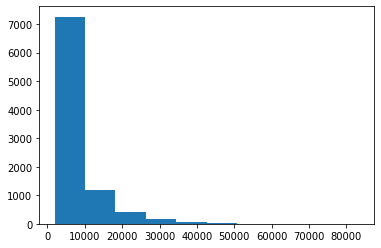

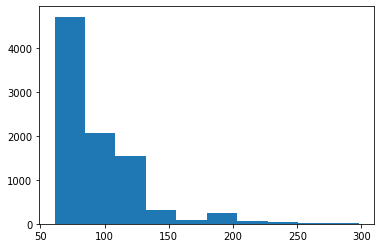

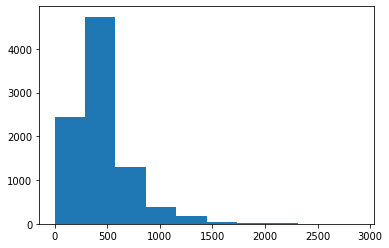

In [10]:
for col in outlier:
    plt.hist(numeric[col])
    plt.show()    

<AxesSubplot:ylabel='total_claim_amount'>

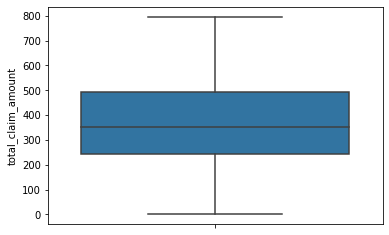

In [11]:
sns.boxplot(y=data['total_claim_amount'])

<AxesSubplot:ylabel='monthly_premium_auto'>

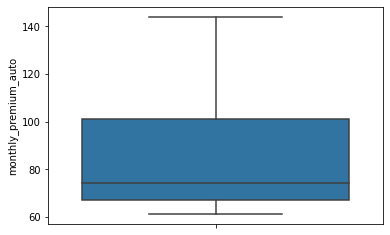

In [12]:

sns.boxplot(y=data['monthly_premium_auto'])

<AxesSubplot:ylabel='total_claim_amount'>

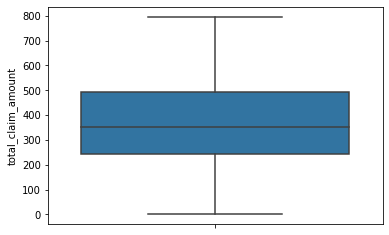

In [13]:
sns.boxplot(y=data['total_claim_amount'])

In [14]:
data_copy = data.copy()

In [15]:
data_copy.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [16]:
data_copy['policy'].value_counts()

Personal L3     2731
Personal L2     1676
Personal L1      984
Corporate L3     814
Corporate L2     477
Corporate L1     280
Special L2       129
Special L3       111
Special L1        47
Name: policy, dtype: int64

In [17]:
for col in data_copy.columns:
    if data[col].dtypes == 'object' and data[col].nunique() > 15:
        print(col)

customer
effective_to_date


In [18]:
# Create a dataframe with 'customer','effective_to_date'  columns to be used in encodeing date
date_df = data_copy[['customer','effective_to_date']]
date_df.head()

,customer,effective_to_date
0,BU79786,2/24/11
2,AI49188,2/19/11
3,WW63253,1/20/11
4,HB64268,2/3/11
5,OC83172,1/25/11


In [19]:
# DROP customer AND effective_to_date COLUMNS
data_copy = data_copy.drop(['customer','effective_to_date'], axis = 1)

In [20]:
# I am going to group the dataframe into two: DICRETE AND CONTINOUS VALUES
continuous, discrete = [],[]
def diferentiate():
    for col in data_copy.columns:
        if data_copy[col].nunique() < 10:
            #print("DISCRETE")
            discrete.append(col)
        
        else:
            #print("CONTINOUS")
            continuous.append(col)
    print("CONTINOUS COLUMNS: ",continuous)
    print("DISCRETE COLUMNS: ",discrete)

# CALL THE FUNCTION
diferentiate()  

CONTINOUS COLUMNS:  ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'total_claim_amount']
DISCRETE COLUMNS:  ['state', 'response', 'coverage', 'education', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'number_of_open_complaints', 'number_of_policies', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size']


In [21]:
discrete_df = data_copy[discrete]
display(discrete_df.head())
continous_df = data_copy[continuous]
display(continous_df.head())
# numerical_categoric = customer_discrete.select_dtypes(np.number)
# numerical_categoric.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
5,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,0,2,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879
5,8256.297800,62902,69,14,94,159.383042


In [22]:
# X_cat = pd.get_dummies(discrete, columns = ['gender','state'],drop_first = True)
                           
# print(X_cat)
# Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
#        'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
#        'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
#       dtype='object')


In [23]:
# NUMBER 3
# Check the datatype of columns
continous_df.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
total_claim_amount               float64
dtype: object

In [24]:
# All columns are numerical
# Use MinMaxScaler to normalize
#USE A DIFFERENT SCALAR
from sklearn.preprocessing import MinMaxScaler
kimera = MinMaxScaler().fit(continous_df)
x_standardized = kimera.transform(continous_df)
print(x_standardized.shape)
x_standardized = pd.DataFrame(x_standardized,columns=continous_df.columns)
x_standardized.head()

(7249, 6)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,0.076425,0.562847,0.096386,0.914286,0.050505,0.483288
1,0.970365,0.487763,0.566265,0.514286,0.383838,0.711496
2,0.507535,0.000000,0.542169,0.514286,0.656566,0.665530
3,0.080855,0.438443,0.144578,0.342857,0.444444,0.173400
4,0.561437,0.629140,0.096386,0.400000,0.949495,0.200098


In [25]:
continous_df.isna().sum()/len(continous_df)

customer_lifetime_value          0.0
income                           0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
total_claim_amount               0.0
dtype: float64

In [26]:
# 4. Encode the categorical variables
# Where unique values in a column are <= 5, use Ordinal or Map
discrete_df.nunique()

state                        5
response                     2
coverage                     3
education                    5
employmentstatus             5
gender                       2
location_code                3
marital_status               3
number_of_open_complaints    6
number_of_policies           9
policy_type                  3
policy                       9
renew_offer_type             4
sales_channel                4
vehicle_class                4
vehicle_size                 3
dtype: int64

In [27]:
discrete_df['response'].value_counts()

No     6193
Yes    1056
Name: response, dtype: int64

In [28]:
discrete_df["response"] = discrete_df["response"].map({"Yes" : 1, "No" : 0})
discrete_df['response'].value_counts()

C:\Users\KIMERA\AppData\Local\Temp/ipykernel_14040/3122934675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df["response"] = discrete_df["response"].map({"Yes" : 1, "No" : 0})


0    6193
1    1056
Name: response, dtype: int64

In [29]:
discrete_df['coverage'].value_counts()
#coverage

Basic       4707
Extended    2110
Premium      432
Name: coverage, dtype: int64

In [30]:
discrete_df["coverage"] = discrete_df["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
discrete_df['coverage'].value_counts()

C:\Users\KIMERA\AppData\Local\Temp/ipykernel_14040/1883311945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df["coverage"] = discrete_df["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})


0    4707
1    2110
2     432
Name: coverage, dtype: int64

In [31]:
discrete_df['gender'].value_counts()

F    3712
M    3537
Name: gender, dtype: int64

In [32]:
discrete_df["gender"] = discrete_df["gender"].map({"F" : 0, "M" : 1})
discrete_df['gender'].value_counts()

C:\Users\KIMERA\AppData\Local\Temp/ipykernel_14040/3779893554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df["gender"] = discrete_df["gender"].map({"F" : 0, "M" : 1})


0    3712
1    3537
Name: gender, dtype: int64

In [33]:
discrete_df['location_code'].value_counts()

Suburban    4389
Rural       1506
Urban       1354
Name: location_code, dtype: int64

In [34]:
discrete_df["location_code"] = discrete_df["location_code"].map({"Suburban" : 1, "Rural" : 2, 'Urban':3})
discrete_df['location_code'].value_counts()

C:\Users\KIMERA\AppData\Local\Temp/ipykernel_14040/1108754588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df["location_code"] = discrete_df["location_code"].map({"Suburban" : 1, "Rural" : 2, 'Urban':3})


1    4389
2    1506
3    1354
Name: location_code, dtype: int64

In [35]:

discrete_df['marital_status'].value_counts()

Married     4351
Single      1784
Divorced    1114
Name: marital_status, dtype: int64

In [36]:
discrete_df["marital_status"] = discrete_df["marital_status"].map({"Married" : 1, "Single" : 2, 'Divorced':3})
discrete_df['marital_status'].value_counts()

C:\Users\KIMERA\AppData\Local\Temp/ipykernel_14040/2081923892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df["marital_status"] = discrete_df["marital_status"].map({"Married" : 1, "Single" : 2, 'Divorced':3})


1    4351
2    1784
3    1114
Name: marital_status, dtype: int64

In [37]:
discrete_df['policy_type'].value_counts()

Personal Auto     5391
Corporate Auto    1571
Special Auto       287
Name: policy_type, dtype: int64

In [38]:
discrete_df["policy_type"] = discrete_df["policy_type"].map({"Personal Auto" : 1, "Corporate Auto" : 2, 'Special Auto':3})
discrete_df['policy_type'].value_counts()

C:\Users\KIMERA\AppData\Local\Temp/ipykernel_14040/3301698433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df["policy_type"] = discrete_df["policy_type"].map({"Personal Auto" : 1, "Corporate Auto" : 2, 'Special Auto':3})


1    5391
2    1571
3     287
Name: policy_type, dtype: int64

In [39]:
discrete_df['vehicle_size'].value_counts()


Medsize    5108
Small      1362
Large       779
Name: vehicle_size, dtype: int64

In [40]:
discrete_df["vehicle_size"] = discrete_df["vehicle_size"].map({"Medsize" : 1, "Small" : 2, 'Large':3})
discrete_df['vehicle_size'].value_counts()

C:\Users\KIMERA\AppData\Local\Temp/ipykernel_14040/1275628660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_df["vehicle_size"] = discrete_df["vehicle_size"].map({"Medsize" : 1, "Small" : 2, 'Large':3})


1    5108
2    1362
3     779
Name: vehicle_size, dtype: int64

In [41]:
discrete_df.nunique()

state                        5
response                     2
coverage                     3
education                    5
employmentstatus             5
gender                       2
location_code                3
marital_status               3
number_of_open_complaints    6
number_of_policies           9
policy_type                  3
policy                       9
renew_offer_type             4
sales_channel                4
vehicle_class                4
vehicle_size                 3
dtype: int64

In [42]:
# All columns with more than 5 unique values, I am using oneHotEncoder or get_dummies
oneEncode_cols = ['state','education','employmentstatus','number_of_open_complaints','number_of_policies','policy',
                  'renew_offer_type','sales_channel','vehicle_class']
oneEncode_df = discrete_df[oneEncode_cols]
oneEncode_df.head()

,state,education,employmentstatus,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,vehicle_class
0,Washington,Bachelor,Employed,0,1,Corporate L3,Offer1,Agent,Two-Door Car
2,Nevada,Bachelor,Employed,0,2,Personal L3,Offer1,Agent,Two-Door Car
3,California,Bachelor,Unemployed,0,7,Corporate L2,Offer1,Call Center,SUV
4,Washington,Bachelor,Employed,0,1,Personal L1,Offer1,Agent,Four-Door Car
5,Oregon,Bachelor,Employed,0,2,Personal L3,Offer2,Web,Two-Door Car


In [43]:
# #TRY ONE ENCONDING. ALTHOUGH POLICY HAS SO MANY UNIQUE VALUES
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder().fit(oneEncode_df)

# #print(encoder.categories_) - DOES NOT WORK. WHY???
# #print(encoder.categories_)
# encoded = encoder.transform(oneEncode_df).toarray()
# #print(encoded)

# onehot_encoded = pd.DataFrame(encoded,columns=encoder.categories_)
# onehot_encoded.head()

In [44]:
encoded_df = pd.get_dummies(oneEncode_df, columns = oneEncode_cols,drop_first = True)                           
encoded_df.head()

,state_California,state_Nevada,state_Oregon,state_Washington,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,employmentstatus_Medical Leave,...,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1


In [45]:
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [46]:
# 5. The time variable can be useful. Try to transform its data into a useful one. 
# Convert 'effective_to_date' to datetime 
date_df['effective_to_date'] = date_df['effective_to_date'].apply(lambda x : datetime.strptime(x, '%m/%d/%y'))
continous_df['month'] = date_df['effective_to_date'].dt.month
continous_df['week'] = date_df['effective_to_date'].dt.week
continous_df['day'] = date_df['effective_to_date'].dt.day


C:\Users\KIMERA\AppData\Local\Temp/ipykernel_14040/8200681.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continous_df['month'] = date_df['effective_to_date'].dt.month
C:\Users\KIMERA\AppData\Local\Temp/ipykernel_14040/8200681.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  continous_df['week'] = date_df['effective_to_date'].dt.week
C:\Users\KIMERA\AppData\Local\Temp/ipykernel_14040/8200681.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

In [47]:
continous_df[['day','week','month']].head()

,day,week,month
0,24,8,2
2,19,7,2
3,20,3,1
4,3,5,2
5,25,4,1


In [48]:
# 6. Since the model will only accept numerical data, check and make sure that every column is numerical, 
#if some are not, change it using encoding.

# Combine all the data processed into one dataframe

# oneEncode_df - OneHot Encoded discrete values
# discrete_df - Manually encoded discrete values using map function
# continous_df - continous dataframe. all columns are numerical. I added datetime column encoding onto this dataframe

overall_df = pd.concat([continous_df,discrete_df,encoded_df], axis = 1)
display(overall_df.shape)
overall_df.head()

(7249, 67)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount,month,week,day,state,...,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,2763.519279,56274,69,32,5,384.811147,2,8,24,Washington,...,0,0,0,0,0,0,0,0,0,1
2,12887.431650,48767,108,18,38,566.472247,2,7,19,Nevada,...,0,0,0,0,0,0,0,0,0,1
3,7645.861827,0,106,18,65,529.881344,1,3,20,California,...,0,0,0,0,0,1,0,1,0,0
4,2813.692575,43836,73,12,44,138.130879,2,5,3,Washington,...,0,0,0,0,0,0,0,0,0,0
5,8256.297800,62902,69,14,94,159.383042,1,4,25,Oregon,...,0,1,0,0,0,0,1,0,0,1


In [49]:
# DROP ALL COULUMNS THAT WERE ENCODED
overall_df = overall_df.drop(['state','education','employmentstatus','number_of_open_complaints','number_of_policies','policy',
                  'renew_offer_type','sales_channel','vehicle_class'], axis = 1)

In [50]:
# overall_df.dtypes
# for col in overall_df.columns:
#     print(col, overall_df[col].dtypes)

In [51]:
overall_df.dtypes

customer_lifetime_value           float64
income                              int64
monthly_premium_auto                int64
months_since_last_claim             int64
months_since_policy_inception       int64
total_claim_amount                float64
month                               int64
week                                int64
day                                 int64
response                            int64
coverage                            int64
gender                              int64
location_code                       int64
marital_status                      int64
policy_type                         int64
vehicle_size                        int64
state_California                    uint8
state_Nevada                        uint8
state_Oregon                        uint8
state_Washington                    uint8
education_College                   uint8
education_Doctor                    uint8
education_High School or Below      uint8
education_Master                  

In [52]:
# ALL VALUES ARE NUMERICAL